In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [3]:
uni = pd.read_csv("PCA.csv")
print(uni.describe())
uni.head()

               SAT       Top10     Accept   SFRatio      Expenses   GradRate
count    25.000000   25.000000  25.000000  25.00000     25.000000  25.000000
mean   1266.440000   76.480000  39.200000  12.72000  27388.000000  86.720000
std     108.359771   19.433905  19.727308   4.06735  14424.883165   9.057778
min    1005.000000   28.000000  14.000000   6.00000   8704.000000  67.000000
25%    1240.000000   74.000000  24.000000  11.00000  15140.000000  81.000000
50%    1285.000000   81.000000  36.000000  12.00000  27553.000000  90.000000
75%    1340.000000   90.000000  50.000000  14.00000  34870.000000  94.000000
max    1415.000000  100.000000  90.000000  25.00000  63575.000000  97.000000


,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
uni

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [5]:
# Considering only numerical data
universities = uni.Univ 
uni = uni.iloc[:,1:]
display(uni.head())
# Converting into numpy array
UNI = uni.values
UNI

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


array([[ 1310,    89,    22,    13, 22704,    94],
       [ 1415,   100,    25,     6, 63575,    81],
       [ 1260,    62,    59,     9, 25026,    72],
       [ 1310,    76,    24,    12, 31510,    88],
       [ 1280,    83,    33,    13, 21864,    90],
       [ 1340,    89,    23,    10, 32162,    95],
       [ 1315,    90,    30,    12, 31585,    95],
       [ 1255,    74,    24,    12, 20126,    92],
       [ 1400,    91,    14,    11, 39525,    97],
       [ 1305,    75,    44,     7, 58691,    87],
       [ 1380,    94,    30,    10, 34870,    91],
       [ 1260,    85,    39,    11, 28052,    89],
       [ 1255,    81,    42,    13, 15122,    94],
       [ 1081,    38,    54,    18, 10185,    80],
       [ 1375,    91,    14,     8, 30220,    95],
       [ 1005,    28,    90,    19,  9066,    69],
       [ 1360,    90,    20,    12, 36450,    93],
       [ 1075,    49,    67,    25,  8704,    67],
       [ 1240,    95,    40,    17, 15140,    78],
       [ 1290,    75,    50,   

In [6]:
# Normalizing the numerical data 
uni_normal = scale(UNI)

In [7]:
uni_normal

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [8]:
pca = PCA()
pca_values = pca.fit_transform(uni_normal)

In [9]:
pca_values

array([[-1.00987445e+00, -1.06430962e+00,  8.10663051e-02,
         5.69506350e-02, -1.28754245e-01, -3.46496377e-02],
       [-2.82223781e+00,  2.25904458e+00,  8.36828830e-01,
         1.43844644e-01, -1.25961913e-01, -1.80703168e-01],
       [ 1.11246577e+00,  1.63120889e+00, -2.66786839e-01,
         1.07507502e+00, -1.91814148e-01,  3.45679459e-01],
       [-7.41741217e-01, -4.21874699e-02,  6.05008649e-02,
        -1.57208116e-01, -5.77611392e-01,  1.09163092e-01],
       [-3.11912064e-01, -6.35243572e-01,  1.02405189e-02,
         1.71363672e-01,  1.27261287e-02, -1.69212696e-02],
       [-1.69669089e+00, -3.44363283e-01, -2.53407507e-01,
         1.25643278e-02, -5.26606002e-02, -2.71661600e-02],
       [-1.24682093e+00, -4.90983662e-01, -3.20938196e-02,
        -2.05643780e-01,  2.93505340e-01, -7.80119838e-02],
       [-3.38749784e-01, -7.85168589e-01, -4.93584829e-01,
         3.98563085e-02, -5.44978619e-01, -1.55371653e-01],
       [-2.37415013e+00, -3.86538883e-01,  1.160

In [10]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(uni_normal)

In [11]:
pca_values[:, :4]

array([[-1.00987445, -1.06430962,  0.08106631,  0.05695064],
       [-2.82223781,  2.25904458,  0.83682883,  0.14384464],
       [ 1.11246577,  1.63120889, -0.26678684,  1.07507502],
       [-0.74174122, -0.04218747,  0.06050086, -0.15720812],
       [-0.31191206, -0.63524357,  0.01024052,  0.17136367],
       [-1.69669089, -0.34436328, -0.25340751,  0.01256433],
       [-1.24682093, -0.49098366, -0.03209382, -0.20564378],
       [-0.33874978, -0.78516859, -0.49358483,  0.03985631],
       [-2.37415013, -0.38653888,  0.11609839, -0.45336562],
       [-1.40327739,  2.11951503, -0.44282714, -0.63254327],
       [-1.72610332,  0.08823712,  0.17040366,  0.26090191],
       [-0.45085748, -0.01113295, -0.17574605,  0.23616563],
       [ 0.04023814, -1.00920438, -0.49651717,  0.22929876],
       [ 3.23373034, -0.37458049, -0.49537282, -0.52123771],
       [-2.23626502, -0.37179329, -0.39899365,  0.40696648],
       [ 5.17299212,  0.77991535, -0.38591233, -0.23221171],
       [-1.69964377, -0.

In [12]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [13]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

In [14]:
PCA1 = -0.45*sat - 0.427*top + 0.42*accep ...

SyntaxError: invalid syntax (311047556.py, line 1)

In [15]:
pca.components_

array([[-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
        -0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367],
       [ 0.1870388 ,  0.49780855, -0.15627899,  0.60608085,  0.20474114,
        -0.53247261],
       [ 0.13124033,  0.37489567,  0.0612872 , -0.50739095, -0.62340055,
        -0.43863341],
       [ 0.02064583,  0.4820162 ,  0.8010936 ,  0.07682369,  0.07254775,
         0.33810965],
       [ 0.8580547 , -0.39607492,  0.21693361,  0.1720479 , -0.17376309,
        -0.00353754]])

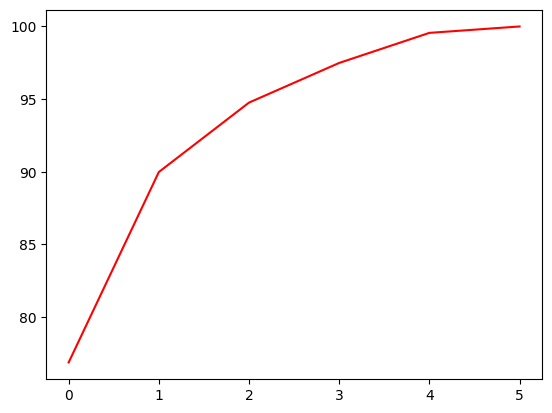

In [16]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [17]:
 pca_values[:,0:1]

array([[-1.00987445],
       [-2.82223781],
       [ 1.11246577],
       [-0.74174122],
       [-0.31191206],
       [-1.69669089],
       [-1.24682093],
       [-0.33874978],
       [-2.37415013],
       [-1.40327739],
       [-1.72610332],
       [-0.45085748],
       [ 0.04023814],
       [ 3.23373034],
       [-2.23626502],
       [ 5.17299212],
       [-1.69964377],
       [ 4.578146  ],
       [ 0.82260312],
       [-0.09776213],
       [ 1.9631826 ],
       [-0.54228894],
       [ 0.53222092],
       [ 3.54869664],
       [-2.30590032]])

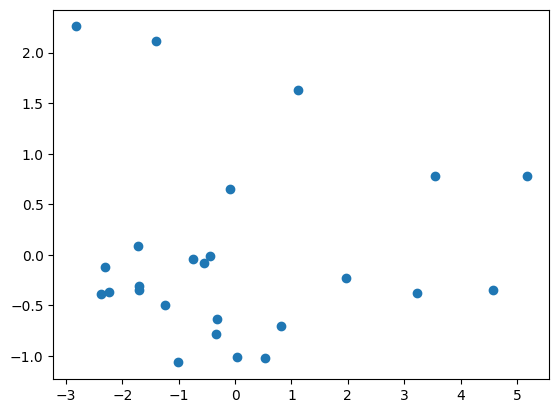

In [18]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
#z = pca_values[:2:3]
plt.scatter(x,y)

In [19]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), universities], axis = 1)

In [20]:
finalDf

,pc1,pc2,Univ
0,-1.009874,-1.064310,Brown
1,-2.822238,2.259045,CalTech
2,1.112466,1.631209,CMU
3,-0.741741,-0.042187,Columbia
4,-0.311912,-0.635244,Cornell
5,-1.696691,-0.344363,Dartmouth
6,-1.246821,-0.490984,Duke
7,-0.338750,-0.785169,Georgetown
8,-2.374150,-0.386539,Harvard
9,-1.403277,2.119515,JohnsHopkins


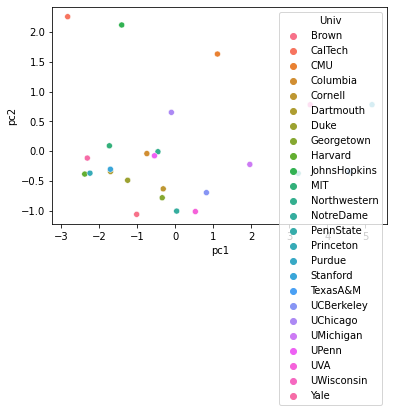

In [ ]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Univ')